**Expression:** 

$Pr(x^*|x_1..x_n) = \int Pr(x^*|\theta)Pr(\theta|x_1..x_n)d\theta$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [12]:
I = 1000 # change to recognize result

# alphaPrior = np.ones(6) # it a special type of ML
alphaPrior = [10, 100, 1000, 1000, 10, 1]

original_probabilities = [0.25,0.15,0.1,0.1,0.15,0.25]
data = np.random.choice(np.arange(7)[1:], I, p=original_probabilities)

# Histogram of categorical distribution
x = np.histogram(data, bins=[1, 2, 3, 4, 5, 6, 7])
# print(alphaPrior)
# print(x[0])
# print(x[1][:-1])

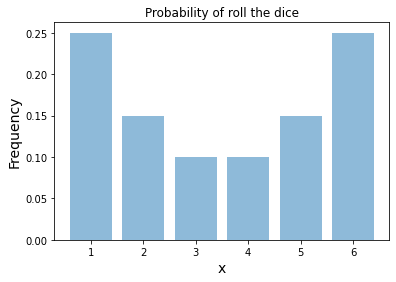

In [13]:
histogram = x[0]
bins = x[1][:-1]
# plt.style.use('ggplot')
# plt.hist(data, bins=6, color = 'b')
plt.bar(bins, np.array(original_probabilities), align='center', alpha=0.5)
plt.xlabel('x', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Probability of roll the dice')

plt.show()

In [14]:
def MleNorm(N, k):
    lambda_ = np.zeros(k)
    sum_ = sum(histogram)
    for idx in range(k):
        lambda_[idx] = histogram[idx]/sum_
    return lambda_
def MapCategoricalNorm(N, k, alpha):
    sumLow = 0
    for idx in range(k):
        sumLow += N[idx] + alpha[idx] - 1
    lambda_ = (N + alpha - 1)/sumLow
    return lambda_

def EvidentNorm(N, k, alpha):
    sumLow = 0
    for idx in range(k):
        sumLow += N[idx] + alpha[idx]
    lambda_ = (N + alpha)/sumLow
    return lambda_

In [15]:
map_ = MapCategoricalNorm(histogram, 6, alphaPrior)
bayense_ = EvidentNorm(histogram, 6, alphaPrior)
mle_ = MleNorm(histogram, 6)
print(histogram)
print('MLE:', mle_)
print('MAP:', map_)
print('Bayense:', bayense_)
print('Original:', original_probabilities)

[259 162  83  82 158 256]
MLE: [0.259 0.162 0.083 0.082 0.158 0.256]
MAP: [0.08603531 0.08378812 0.34735152 0.3470305  0.05361156 0.08218299]
Bayense: [0.08619032 0.08394745 0.34700417 0.34668376 0.0538289  0.0823454 ]
Original: [0.25, 0.15, 0.1, 0.1, 0.15, 0.25]


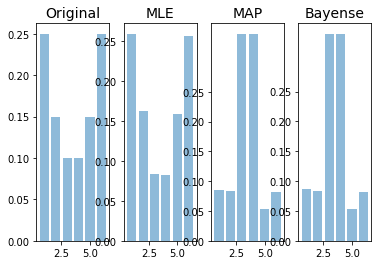

In [16]:
rang = np.arange(0, 0.3, 0.05)
fig, axs = plt.subplots(1, 4)
axs[0].bar(bins, np.array(original_probabilities), align='center', alpha=0.5)
axs[0].set_title('Original', size = 14)
axs[0].set_yticks(rang)


axs[1].bar(bins, np.array(mle_), align='center', alpha=0.5)
axs[1].set_title('MLE', size = 14)
axs[1].set_yticks(rang)


axs[2].bar(bins, np.array(map_), align='center', alpha=0.5)
axs[2].set_title('MAP', size = 14)
axs[2].set_yticks(rang)

axs[3].bar(bins, np.array(bayense_), align='center', alpha=0.5)
axs[3].set_title('Bayense', size = 14)
axs[3].set_yticks(rang)


plt.show()